In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [2]:
from scipy.optimize import curve_fit

In [3]:
fig_width_pt = 100  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [4]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = plt.cycler("color", plt.cm.Dark2.colors)

# $r_c(\rho_{\rm o})$

In [161]:
list_rho0=np.arange(5,36,1)

list_sigmaf=np.arange(4, 15, 1)

In [162]:
sample_rev_rho0={}

for rho0 in list_rho0:

    sample_rev_rho0[rho0]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_rho0[rho0][sigmaf]=np.loadtxt('data_rho0_sigmaf/rho0%d/sigmaf%d/f_mag.dat'%(rho0, sigmaf))
        except:
            print(rho0,sigmaf)


6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16 14
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
21 4
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
22 4
22 5
22 6
22 7
22 8
22 9
22 10
22 11
22 12
22 13
22 14
23 4
23 5
23 6
23 7
23 8
23 9
23 10
23 11
23 12
23 13
23 14
24 4
24 5
24 6
24 7
24 8
24 9
24 10
24 11
24 12
24 13
24 14
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
27 4
27 5
27 6
27 7
27 8
27 9
27 10
27 11
27 12
27 13
27 14
28 4
28 5
28 6
28 7
28 8
28 9
28 10
28 11
28 12
28 13
28 14
29 4
29 5
29 6
29 7
29 8
29 9
29 10
29 11
29 12
29 13
29 14
31 4
31 5
31 6
31 7
31 8
31 9
31 10
31 11
31 12
31 13
31 14
32

In [163]:
p_rev={rho0:[np.mean(np.array(sample_rev_rho0[rho0][s])>0.1) for s in sample_rev_rho0[rho0]] for rho0 in list_rho0}

Text(0, 0.5, 'Probability of reversal')

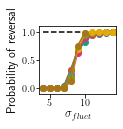

In [174]:
for rho0 in [7, 11, 15, 20, 25, 30, 35]:
    abs_rhof=np.sort(list(sample_rev_rho0[rho0]))
    ordo_prev=np.array(p_rev[rho0])[np.argsort(list(sample_rev_rho0[rho0]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\rho_0=%d$'%rho0)

plt.ylim(-0.1,1.1)

plt.hlines(1, 4, 14, color='k', linestyles='--')
#plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

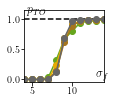

In [173]:
# plt.text(x=450, y=140, s=r'$\mathrm{(b)}$')
for p in range(4):
    plt.plot([], [])

for rho0 in [7, 15,  20, 30]:
    abs_rhof=np.sort(list(sample_rev_rho0[rho0]))
    ordo_prev=np.array(p_rev[rho0])[np.argsort(list(sample_rev_rho0[rho0]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\rho_0=%d$'%rho0)

#plt.legend(loc=(0.55, 0.1))

plt.ylim(-0.05,1.15)
plt.xlim(4,14)
plt.hlines(1, 4, 14, color='k', linestyles='--')

plt.xlabel(r'$\sigma_f$', labelpad=-25, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$p_{TO}$', labelpad=-28, y=0.9, rotation=0, zorder=100);

plt.tight_layout(pad=0.01)
plt.savefig('TO_proba_rho0.pdf');

In [166]:
def fitTanh(x, x0, k):
    return(0.5*(1+np.tanh(k*(x-x0))))

In [167]:
popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))
popt

array([8.71450085, 1.3968106 ])

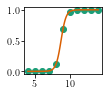

In [168]:
plt.plot(abs_rhof, ordo_prev, 'o')
x=np.linspace(4,14,100)
plt.plot(x, fitTanh(x, *popt))

In [169]:
list_x0_rho0=[]
for rho0 in list(sample_rev_rho0):
    try:
        abs_rhof=np.sort(list(sample_rev_rho0[rho0]))
        ordo_prev=np.array(p_rev[rho0])[np.argsort(list(sample_rev_rho0[rho0]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

        list_x0_rho0.append(popt[0])
    except:
        list_x0_rho0.append(np.nan)

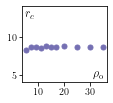

In [178]:
v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

ax_beta=plt.subplot()

##################### r_c beta ##########################

ax_beta.plot([], [])
ax_beta.plot([], [])

ax_beta.plot(list(sample_rev_rho0), list_x0_rho0, 'o', markersize=5)#, linewidth=0.5)

ax_beta.set_xlabel(r'$\rho_{\rm o}$', labelpad=-25, x=0.9, rotation=0, zorder=100);
ax_beta.set_ylabel(r'$r_c$', labelpad=-22, y=0.82, rotation=0, zorder=100);

ax_beta.set_ylim(4, 14)
# plt.xlim(0.42,0.57)

# ##################### r_c D ##########################

# ax_D.plot([], [])
# ax_D.plot([], [])
# ax_D.plot([], [])
# ax_D.plot([], [])
# ax_D.plot(list(sample_rev_D), list_x0_D, 'o-', markersize=1.8, linewidth=0.5)

# ax_D.set_xlabel(r'$D$', labelpad=-20, x=0.9, rotation=0, zorder=100);
# ax_D.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

# ax_D.set_yticks([6, 8, 10, 12])

# plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.17, right=0.83, top=0.99, bottom=0.17)

plt.tight_layout(pad=0.01)
plt.savefig('rc_rho0.pdf', dpi=400);


# $r_c(v)$

In [148]:
list_v=np.round(np.arange(0.4,4.0,0.1),1)

list_sigmaf=np.arange(4, 15, 1)

In [149]:
sample_rev_v={}

for v in list_v:

    sample_rev_v[v]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_v[v][sigmaf]=np.loadtxt('data_v_sigmaf/v%.1f/sigmaf%d/f_mag.dat'%(v, sigmaf))
        except:
            print(v,sigmaf)


0.7 4
0.7 5
0.7 6
0.7 7
0.7 8
0.7 9
0.7 10
0.7 11
0.7 12
0.7 13
0.7 14
0.8 14
0.9 4
0.9 5
0.9 6
0.9 7
0.9 8
0.9 9
0.9 10
0.9 11
0.9 12
0.9 13
0.9 14
1.1 4
1.1 5
1.1 6
1.1 7
1.1 8
1.1 9
1.1 10
1.1 11
1.1 12
1.1 13
1.1 14
1.3 4
1.3 5
1.3 6
1.3 7
1.3 8
1.3 9
1.3 10
1.3 11
1.3 12
1.3 13
1.3 14
1.7 4
1.7 5
1.7 6
1.7 7
1.7 8
1.7 9
1.7 10
1.7 11
1.7 12
1.7 13
1.7 14
1.9 4
1.9 5
1.9 6
1.9 7
1.9 8
1.9 9
1.9 10
1.9 11
1.9 12
1.9 13
1.9 14
2.1 4
2.1 5
2.1 6
2.1 7
2.1 8
2.1 9
2.1 10
2.1 11
2.1 12
2.1 13
2.1 14
2.2 12
2.2 13
2.2 14
2.3 4
2.3 5
2.3 6
2.3 7
2.3 8
2.3 9
2.3 10
2.3 11
2.3 12
2.3 13
2.3 14
2.4 4
2.4 5
2.4 6
2.4 7
2.4 8
2.4 9
2.4 10
2.4 11
2.4 12
2.4 13
2.4 14
2.6 4
2.6 5
2.6 6
2.6 7
2.6 8
2.6 9
2.6 10
2.6 11
2.6 12
2.6 13
2.6 14
2.7 4
2.7 5
2.7 6
2.7 7
2.7 8
2.7 9
2.7 10
2.7 11
2.7 12
2.7 13
2.7 14
2.8 4
2.8 5
2.8 6
2.8 7
2.8 8
2.8 9
2.8 10
2.8 11
2.8 12
2.8 13
2.8 14
2.9 4
2.9 5
2.9 6
2.9 7
2.9 8
2.9 9
2.9 10
2.9 11
2.9 12
2.9 13
2.9 14
3.1 4
3.1 5
3.1 6
3.1 7
3.1 8
3.1 9
3.1 10
3.1 11

In [150]:
p_rev_v={v:[np.mean(np.array(sample_rev_v[v][s])>0.01) for s in sample_rev_v[v]] for v in list_v}

In [151]:
for v in list_v:
    abs_rhof=np.sort(list(sample_rev_v[v]))
    ordo_prev=np.array(p_rev[v])[np.argsort(list(sample_rev_v[v]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$v=%.1f$'%v)

plt.ylim(-0.05,1.05)
#plt.xlim(4,14)
#plt.hlines(1, 4, 14, color='k', linestyles='--')

#plt.hlines([0.2, 0.5, 0.8], 4, 14, color='k', linestyles='--')

    
#plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

KeyError: 0.4

In [152]:
list_x0_v=[]
list_abs_v=[]

for v in list(sample_rev_v):
    try:
        abs_rhof=np.sort(list(sample_rev_v[v]))
        ordo_prev=np.array(p_rev_v[v])[np.argsort(list(sample_rev_v[v]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

        list_x0_v.append(popt[0])
        list_abs_v.append(v)
    except:
        pass

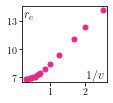

In [160]:

ax_v=plt.subplot()

ax_v.plot([], [])
ax_v.plot([], [])
ax_v.plot([], [])

ax_v.plot(1/np.array(list_abs_v), list_x0_v, 'o', markersize=5)

ax_v.set_xlabel(r'$1/v$', labelpad=-27, x=0.87, rotation=0, zorder=100);
ax_v.set_ylabel(r'$r_c$', labelpad=-21, y=0.8, rotation=0, zorder=100);

#ax_v.set_xlim(0.4,2.5)

ax_v.set_yticks([7, 10, 13])

plt.tight_layout(pad=0.01)

plt.savefig('rc_v.pdf', dpi=400);


# $r_c(D)$

In [134]:
list_D=np.round(np.arange(0.4,2.2,0.2), 1)

list_sigmaf=np.arange(4, 15, 1)

In [135]:
sample_rev_D={}

for D in list_D:

    sample_rev_D[D]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_D[D][sigmaf]=np.loadtxt('data_D_sigmaf/D%.1f/sigmaf%d/f_mag.dat'%(D, sigmaf))
        except:
            print(D,sigmaf)


1.6 14
1.8 12
2.0 4
2.0 5
2.0 6
2.0 7
2.0 8
2.0 9
2.0 10
2.0 11
2.0 12
2.0 13
2.0 14


In [136]:
p_rev_D={D:[np.mean(np.array(sample_rev_D[D][s])>0.01) for s in sample_rev_D[D]] for D in list_D}

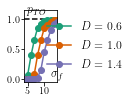

In [137]:
for D in [0.6, 1.0, 1.4]:
    abs_rhof=np.sort(list(sample_rev_D[D]))
    ordo_prev=np.array(p_rev_D[D])[np.argsort(list(sample_rev_D[D]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$D=%.1f$'%D)


plt.legend(loc=(0.55, 0.1))

plt.ylim(-0.05,1.15)
plt.xlim(4,14)
plt.hlines(1, 4, 14, color='k', linestyles='--')

plt.xlabel(r'$\sigma_f$', labelpad=-25, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$p_{TO}$', labelpad=-28, y=0.9, rotation=0, zorder=100);

plt.tight_layout(pad=0.01)
plt.savefig('TO_proba_D.pdf');

In [138]:
list_x0_D=[]
for D in list(sample_rev_D):
    try:
        abs_rhof=np.sort(list(sample_rev_D[D]))
        ordo_prev=np.array(p_rev_D[D])[np.argsort(list(sample_rev_D[D]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

        list_x0_D.append(popt[0])
    except:
        list_x0_D.append(np.nan)

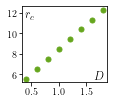

In [147]:

ax_D=plt.subplot()

##################### r_c D ##########################

ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot(list(sample_rev_D), list_x0_D, 'o', markersize=5)#, linewidth=0.5)

ax_D.set_xlabel(r'$D$', labelpad=-25, x=0.91, rotation=0, zorder=100);
ax_D.set_ylabel(r'$r_c$', labelpad=-22, y=0.8, rotation=0, zorder=100);

ax_D.set_yticks([6, 8, 10, 12])

plt.tight_layout(pad=0.01)

plt.savefig('rc_D.pdf', dpi=400);


# $r_c(T)$

In [98]:
list_beta=np.round(np.arange(1.8, 2.8, 0.05), 2)

list_sigmaf=np.arange(4, 15, 1)

In [99]:
sample_rev_beta={}

for beta in list_beta:

    sample_rev_beta[beta]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_beta[beta][sigmaf]=np.loadtxt('data_beta_sigmaf/beta%.2f/sigmaf%d/f_mag.dat'%(beta, sigmaf))
        except:
            print(beta,sigmaf)


2.3 14
2.35 4
2.35 5
2.35 6
2.35 7
2.35 8
2.35 9
2.35 10
2.35 11
2.35 12
2.35 13
2.35 14
2.45 4
2.45 5
2.45 6
2.45 7
2.45 8
2.45 9
2.45 10
2.45 11
2.45 12
2.45 13
2.45 14
2.5 4
2.5 5
2.5 6
2.5 7
2.5 8
2.5 9
2.5 10
2.5 11
2.5 12
2.5 13
2.5 14
2.55 4
2.55 5
2.55 6
2.55 7
2.55 8
2.55 9
2.55 10
2.55 11
2.55 12
2.55 13
2.55 14
2.65 4
2.65 5
2.65 6
2.65 7
2.65 8
2.65 9
2.65 10
2.65 11
2.65 12
2.65 13
2.65 14
2.7 4
2.7 5
2.7 6
2.7 7
2.7 8
2.7 9
2.7 10
2.7 11
2.7 12
2.7 13
2.7 14
2.75 4
2.75 5
2.75 6
2.75 7
2.75 8
2.75 9
2.75 10
2.75 11
2.75 12
2.75 13
2.75 14


In [100]:
p_rev={beta:[np.mean(np.array(sample_rev_beta[beta][s])>0.01) for s in sample_rev_beta[beta]] for beta in list_beta}

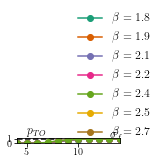

In [101]:
for beta in list_beta[::3]:
    abs_rhof=np.sort(list(sample_rev_beta[beta]))
    ordo_prev=np.array(p_rev[beta])[np.argsort(list(sample_rev_beta[beta]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\beta=%.1f$'%beta)


plt.legend(loc=(0.55, 0.1))

plt.ylim(-0.05,1.15)
plt.xlim(4,14)
plt.hlines(1, 4, 14, color='k', linestyles='--')

plt.xlabel(r'$\sigma_f$', labelpad=-25, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$p_{TO}$', labelpad=-28, y=0.9, rotation=0, zorder=100);

plt.tight_layout(pad=0.01)
plt.savefig('TO_proba_beta.pdf');

In [102]:
list_x0_beta=[]
list_abs_beta=[]
for beta in list(sample_rev_beta):
    try:
        abs_rhof=np.sort(list(sample_rev_beta[beta]))
        ordo_prev=np.array(p_rev[beta])[np.argsort(list(sample_rev_beta[beta]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

        list_x0_beta.append(popt[0])
        list_abs_beta.append(beta)
    except:
        pass

In [103]:
list_x0_beta=[]
list_abs_beta=[]
for beta in list(sample_rev_beta):
    abs_rhof=np.sort(list(sample_rev_beta[beta]))
    ordo_prev=np.array(p_rev[beta])[np.argsort(list(sample_rev_beta[beta]))]

    popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

    list_x0_beta.append(popt[0])
    list_abs_beta.append(beta)


ValueError: `ydata` must not be empty!

In [121]:
fig_width_pt = 100  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 0.9*fig_width_pt
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

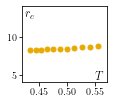

In [133]:
v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

ax_beta=plt.subplot()

##################### r_c beta ##########################

ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])

ax_beta.plot(1/np.array(list_abs_beta), list_x0_beta, 'o', markersize=5)#, linewidth=0.5)

ax_beta.set_xlabel(r'$T$', labelpad=-25, x=0.9, rotation=0, zorder=100);
ax_beta.set_ylabel(r'$r_c$', labelpad=-22, y=0.82, rotation=0, zorder=100);

ax_beta.set_ylim(4, 14)
plt.xlim(0.42,0.57)

# ##################### r_c D ##########################

# ax_D.plot([], [])
# ax_D.plot([], [])
# ax_D.plot([], [])
# ax_D.plot([], [])
# ax_D.plot(list(sample_rev_D), list_x0_D, 'o-', markersize=1.8, linewidth=0.5)

# ax_D.set_xlabel(r'$D$', labelpad=-20, x=0.9, rotation=0, zorder=100);
# ax_D.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

# ax_D.set_yticks([6, 8, 10, 12])

# plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.17, right=0.83, top=0.99, bottom=0.17)

plt.tight_layout(pad=0.01)
plt.savefig('rc_T.pdf', dpi=400);


# $P_r(r)$

In [5]:
list_L=np.array([200, 250, 300, 350, 400, 500, 600, 700, 800])

list_sigmaf=np.arange(4, 15, 1)

In [6]:
sample_rev_L={}

for L in list_L:

    sample_rev_L[L]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_L[L][sigmaf]=np.loadtxt('data_L_sigmaf/L%d/sigmaf%d/f_mag.dat'%(L, sigmaf))
        except:
            print(L,sigmaf)


In [7]:
sample_rev_L[L][sigmaf]

array([41.165364, 43.425423, 42.295393, 42.698975, 45.443333, 47.541959,
       42.537542, 41.891811, 41.891811, 44.071154, 43.506139, 41.326796,
       41.972528, 40.519632, 41.649662, 42.779692, 42.860408, 41.811095,
       40.600349, 42.053244, 41.730378, 43.829005, 48.833422, 42.295393,
       43.506139, 40.438916, 41.811095, 44.797602, 42.295393, 49.237004,
       41.972528, 42.13396 , 41.649662, 41.407513, 44.636169, 42.860408,
       42.456826, 41.568946, 44.071154, 42.214677, 42.537542, 42.941124,
       43.829005, 48.42984 , 43.829005,  0.      , 40.681065, 43.344706,
       43.26399 , 41.568946,  0.      , 40.681065, 43.829005, 42.456826,
       40.3582  , 42.214677, 41.326796, 43.829005, 41.165364, 43.506139,
       46.008348, 46.573362, 44.959034, 41.003931, 44.555452, 40.035334,
       41.972528, 41.165364, 42.053244, 40.11605 , 51.093481, 42.456826,
       43.506139, 41.24608 , 43.586856, 43.829005, 40.681065, 46.734795,
       42.456826, 45.2819  , 41.811095, 45.120467, 

In [8]:
p_rev_L={L:[np.mean(np.array(sample_rev_L[L][s])>0.01) for s in sample_rev_L[L]] for L in list_L}

In [9]:
fig_width_pt = 150  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 1.15*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [11]:
def fitTanh(x, x0, k):
    return(0.5*(1+np.tanh(k*(x-x0))))

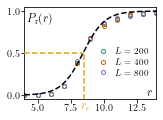

In [14]:
v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

ax_L=plt.subplot()

##################### Tanh L ##########################
for L in [200, 400, 800]:
    abs_rhof=np.sort(list(sample_rev_L[L]))
    ordo_prev=np.array(p_rev_L[L])[np.argsort(list(sample_rev_L[L]))]
    ax_L.plot(abs_rhof, ordo_prev, 'o', label=r'$L=%d$'%L, markersize=4, linewidth=0.8, mfc='none')

popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(7, 5))
absx=np.linspace(4,14,1000)
ax_L.plot(absx, fitTanh(absx, *popt), 'k--')

lcol='goldenrod'
ax_L.hlines(0.5,4,8.5,linestyle='--', color=lcol, zorder=10)
ax_L.vlines(8.5,-1,0.5,linestyle='--', color=lcol, zorder=10)
ax_L.text(s=r'$r_c$', x=8.3, y=-0.18, color=lcol)

l=ax_L.legend(fontsize=9, labelspacing=0.2, handletextpad=0.3, loc=(0.5,0.2), ncol=1, columnspacing=0.25)
l.set_in_layout(False)
ax_L.set_ylim(-0.05,1.05)
ax_L.set_xlim(4,14)

ax_L.set_xlabel(r'$r$', labelpad=-25, x=0.95, rotation=0, zorder=100);
plt.ylabel(r'$P_{\rm r}(r)$', labelpad=-33, y=0.8, rotation=0)

plt.tight_layout(pad=0.01)

plt.savefig('Pr_r.pdf', dpi=400);


# $P_r(\rho_d^0)$

In [15]:
list_h0=np.round(np.arange(0.,1.6,0.1),1)

In [16]:
sample_rev_h0={}

for h0 in list_h0[1:]:

    sample_rev_h0[h0]=np.loadtxt('data_prl/h0%.1f/sigmaf%d/f_mag.dat'%(h0, 6))



In [17]:
p_rev={h0:np.mean(np.array(sample_rev_h0[h0])>0.01) for h0 in list_h0[1:]}
p_rev[0]=0


In [18]:
p_rev

{0.1: 0.004,
 0.2: 0.008,
 0.3: 0.038,
 0.4: 0.127,
 0.5: 0.294,
 0.6: 0.528,
 0.7: 0.73,
 0.8: 0.871,
 0.9: 0.948,
 1.0: 0.99,
 1.1: 0.995,
 1.2: 0.999,
 1.3: 0.999,
 1.4: 1.0,
 1.5: 1.0,
 0: 0}

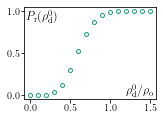

In [20]:
plt.plot(list_h0, [p_rev[h0] for h0 in list_h0], 'o', markerfacecolor='none', markersize=4)

plt.xlabel(r'$\rho_{\rm d}^0/\rho_{\rm o}$', labelpad=-26, x=0.87)
plt.ylabel(r'$P_{\rm r}(\rho_{\rm d}^0)$', labelpad=-35, y=0.8, rotation=0)

plt.tight_layout(pad=0.01)

plt.savefig('Pr_rho0d.pdf');

In [241]:
data=np.zeros((len((1+list_h0)),2))

In [242]:
data[:,0]=(1+list_h0)
data

array([[1. , 0. ],
       [1.1, 0. ],
       [1.2, 0. ],
       [1.3, 0. ],
       [1.4, 0. ],
       [1.5, 0. ],
       [1.6, 0. ],
       [1.7, 0. ],
       [1.8, 0. ],
       [1.9, 0. ],
       [2. , 0. ],
       [2.1, 0. ],
       [2.2, 0. ],
       [2.3, 0. ],
       [2.4, 0. ],
       [2.5, 0. ]])

In [243]:
data[:,1]=[p_rev[h0] for h0 in list_h0]
data

array([[1.   , 0.   ],
       [1.1  , 0.004],
       [1.2  , 0.008],
       [1.3  , 0.038],
       [1.4  , 0.127],
       [1.5  , 0.294],
       [1.6  , 0.528],
       [1.7  , 0.73 ],
       [1.8  , 0.871],
       [1.9  , 0.948],
       [2.   , 0.99 ],
       [2.1  , 0.995],
       [2.2  , 0.999],
       [2.3  , 0.999],
       [2.4  , 1.   ],
       [2.5  , 1.   ]])

In [244]:
np.savetxt('data_h_P.dat', data, header='rho_d^0/rho_0 P_r(rho_d^0)')

# $\sigma_c$ varying $h_0$

In [22]:
list_h0=np.array([0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70])

list_sigmaf=np.arange(2, 15, 1)

In [23]:
sample_rev_h0={}

for h0 in list_h0:

    sample_rev_h0[h0]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_h0[h0][sigmaf]=np.loadtxt('data_h0_sigmaf/h0%.2f/sigmaf%d/f_mag.dat'%(h0, sigmaf))
        except:
            print(h0,sigmaf)


0.05 2
0.05 3
0.1 2
0.1 3
0.15 2
0.15 3
0.2 2
0.2 3
0.25 2
0.25 3
0.3 2
0.3 3
0.35 2
0.35 3
0.35 13
0.35 14
0.4 2
0.4 3
0.4 14
0.45 12
0.45 13
0.45 14
0.5 12
0.5 13
0.5 14
0.55 12
0.55 13
0.55 14
0.6 12
0.6 13
0.6 14
0.65 12
0.65 13
0.65 14
0.7 12
0.7 13
0.7 14


In [24]:
p_rev={h0:[np.mean(np.array(sample_rev_h0[h0][s])>0.01) for s in sample_rev_h0[h0]] for h0 in list_h0}

In [25]:
p_rev_rho={rc:[np.mean(np.array(sample_rev_h0[h0][rc])>0.01) for h0 in sample_rev_h0] for rc in list_sigmaf}

KeyError: 2

Text(0, 0.5, '$P_r(\\rho_d^0)$')

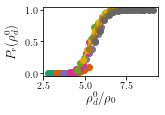

In [42]:
for rc in np.arange(4,14):
    try:
        plt.plot((1+list_h0)*(rc**(0.7)), [np.mean(sample_rev_h0[h0][rc]>0.01) for h0 in list_h0], 'o-', label=r'$r_c = %.1f$'%rc)
    except:
        pass
    #plt.legend()
    
plt.xlabel(r"$\rho_d^0/\rho_0$", fontsize=13)
plt.ylabel(r"$P_r(\rho_d^0)$", fontsize=13)

In [203]:
data=np.zeros((len((1+list_h0)),9))

In [204]:
data[:,0]=(1+list_h0)
data

array([[1.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.15, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.3 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.35, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.45, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.55, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.6 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.65, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.7 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [212]:
rc=11

data[:,rc-3]=[np.mean(sample_rev_h0[h0][rc]>0.1) for h0 in list_h0]
data

array([[1.05 , 0.   , 0.   , 0.   , 0.01 , 0.056, 0.202, 0.386, 0.504],
       [1.1  , 0.   , 0.   , 0.   , 0.016, 0.156, 0.36 , 0.556, 0.664],
       [1.15 , 0.   , 0.   , 0.006, 0.06 , 0.244, 0.504, 0.694, 0.836],
       [1.2  , 0.   , 0.   , 0.002, 0.074, 0.366, 0.67 , 0.85 , 0.918],
       [1.25 , 0.   , 0.   , 0.014, 0.15 , 0.542, 0.806, 0.904, 0.97 ],
       [1.3  , 0.   , 0.002, 0.046, 0.312, 0.734, 0.878, 0.974, 0.986],
       [1.35 , 0.   , 0.   , 0.076, 0.488, 0.786, 0.96 , 0.984, 0.996],
       [1.4  , 0.   , 0.004, 0.118, 0.574, 0.888, 0.976, 1.   , 1.   ],
       [1.45 , 0.   , 0.004, 0.226, 0.682, 0.946, 0.994, 1.   , 1.   ],
       [1.5  , 0.   , 0.02 , 0.324, 0.762, 0.974, 0.996, 1.   , 1.   ],
       [1.55 , 0.   , 0.036, 0.378, 0.888, 0.994, 0.998, 1.   , 1.   ],
       [1.6  , 0.   , 0.046, 0.486, 0.926, 0.998, 1.   , 1.   , 1.   ],
       [1.65 , 0.   , 0.086, 0.624, 0.972, 1.   , 1.   , 1.   , 1.   ],
       [1.7  , 0.002, 0.102, 0.724, 0.994, 1.   , 1.   , 1.   , 

In [214]:
np.savetxt('data_h_rc.dat', data, header='rho_d^0/rho_0 rc=4 rc=5 rc=6 rc=7 rc=8 rc=9 rc=10 rc=11')

In [ ]:
for h0 in list_h0:
    abs_rhof=np.sort(list(sample_rev_h0[h0]))
    ordo_prev=np.array(p_rev[h0])[np.argsort(list(sample_rev_h0[h0]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$h_0=%.2f$'%h0)


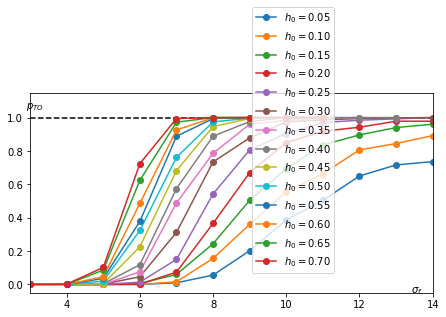

In [175]:
for h0 in list_h0:
    abs_rhof=np.sort(list(sample_rev_h0[h0]))
    ordo_prev=np.array(p_rev[h0])[np.argsort(list(sample_rev_h0[h0]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$h_0=%.2f$'%h0)


plt.legend(loc=(0.55, 0.1))

plt.ylim(-0.05,1.15)
plt.xlim(3,14)
plt.hlines(1, 3, 14, color='k', linestyles='--')

plt.xlabel(r'$\sigma_f$', labelpad=-25, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$p_{TO}$', labelpad=-28, y=0.9, rotation=0, zorder=100);

plt.tight_layout(pad=0.01)
plt.savefig('TO_proba_h0.pdf');

In [176]:
list_x0_h0=[]
list_abs_h0=[]
for h0 in list(sample_rev_h0):
    try:
        abs_rhof=np.sort(list(sample_rev_h0[h0]))
        ordo_prev=np.array(p_rev[h0])[np.argsort(list(sample_rev_h0[h0]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

        list_x0_h0.append(popt[0])
        list_abs_h0.append(h0)
    except:
        pass

In [177]:
list_x0_h0=[]
list_abs_h0=[]
for h0 in list(sample_rev_h0):
    abs_rhof=np.sort(list(sample_rev_h0[h0]))
    ordo_prev=np.array(p_rev[h0])[np.argsort(list(sample_rev_h0[h0]))]

    popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

    list_x0_h0.append(popt[0])
    list_abs_h0.append(h0)
list_rc=np.array(list_x0_h0)
list_abs_h0=np.array(list_abs_h0)

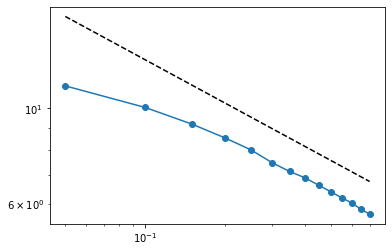

In [164]:
plt.loglog(list_abs_h0, list_rc, 'o-')
plt.loglog(list_abs_h0, 6*list_abs_h0**(-1/3), 'k--')

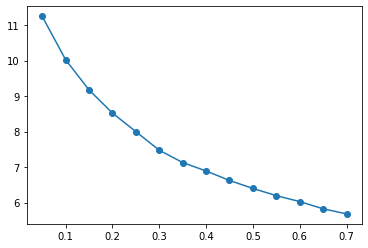

In [167]:
plt.plot(list_abs_h0, list_rc, 'o-')


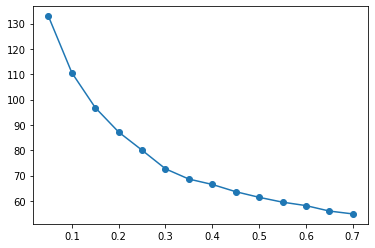

In [165]:
plt.plot(list_abs_h0, (list_rc**2)*(1+list_abs_h0), 'o-')

In [168]:
data=np.zeros((len(list_abs_h0),2))

In [169]:
data[:,0]=list_abs_h0
data

array([[0.05, 0.  ],
       [0.1 , 0.  ],
       [0.15, 0.  ],
       [0.2 , 0.  ],
       [0.25, 0.  ],
       [0.3 , 0.  ],
       [0.35, 0.  ],
       [0.4 , 0.  ],
       [0.45, 0.  ],
       [0.5 , 0.  ],
       [0.55, 0.  ],
       [0.6 , 0.  ],
       [0.65, 0.  ],
       [0.7 , 0.  ]])

In [170]:
data[:,1]=list_rc
data

array([[ 0.05      , 11.24902058],
       [ 0.1       , 10.02622911],
       [ 0.15      ,  9.17442567],
       [ 0.2       ,  8.52224105],
       [ 0.25      ,  7.9991893 ],
       [ 0.3       ,  7.47486379],
       [ 0.35      ,  7.12781865],
       [ 0.4       ,  6.89014006],
       [ 0.45      ,  6.6232999 ],
       [ 0.5       ,  6.39727269],
       [ 0.55      ,  6.19453608],
       [ 0.6       ,  6.02686171],
       [ 0.65      ,  5.82388028],
       [ 0.7       ,  5.67945521]])

In [171]:
np.savetxt('data_h_rc.dat', data, header='h r_c')

# $\sigma_c$ at $\rho_f = 0.2\rho_0$ varying $L$

In [43]:
list_L=np.array([200, 250, 300, 350, 400, 500, 600, 700, 800])

list_sigmaf=np.arange(4, 15, 1)

In [44]:
sample_rev_L={}

for L in list_L:

    sample_rev_L[L]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_L[L][sigmaf]=np.loadtxt('data_L_sigmaf/L%d/sigmaf%d/f_mag.dat'%(L, sigmaf))
        except:
            print(L,sigmaf)


In [45]:
sample_rev_L[L][sigmaf]

array([41.165364, 43.425423, 42.295393, 42.698975, 45.443333, 47.541959,
       42.537542, 41.891811, 41.891811, 44.071154, 43.506139, 41.326796,
       41.972528, 40.519632, 41.649662, 42.779692, 42.860408, 41.811095,
       40.600349, 42.053244, 41.730378, 43.829005, 48.833422, 42.295393,
       43.506139, 40.438916, 41.811095, 44.797602, 42.295393, 49.237004,
       41.972528, 42.13396 , 41.649662, 41.407513, 44.636169, 42.860408,
       42.456826, 41.568946, 44.071154, 42.214677, 42.537542, 42.941124,
       43.829005, 48.42984 , 43.829005,  0.      , 40.681065, 43.344706,
       43.26399 , 41.568946,  0.      , 40.681065, 43.829005, 42.456826,
       40.3582  , 42.214677, 41.326796, 43.829005, 41.165364, 43.506139,
       46.008348, 46.573362, 44.959034, 41.003931, 44.555452, 40.035334,
       41.972528, 41.165364, 42.053244, 40.11605 , 51.093481, 42.456826,
       43.506139, 41.24608 , 43.586856, 43.829005, 40.681065, 46.734795,
       42.456826, 45.2819  , 41.811095, 45.120467, 

In [46]:
p_rev_L={L:[np.mean(np.array(sample_rev_L[L][s])>0.01) for s in sample_rev_L[L]] for L in list_L}

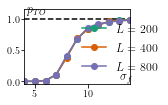

In [47]:
# plt.text(x=450, y=140, s=r'$\mathrm{(b)}$')

for L in [200, 400, 800]:
    abs_rhof=np.sort(list(sample_rev_L[L]))
    ordo_prev=np.array(p_rev_L[L])[np.argsort(list(sample_rev_L[L]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$L=%d$'%L)
plt.legend(loc=(0.5, 0.1))

plt.ylim(-0.05,1.15)
plt.xlim(4,14)
plt.hlines(1, 4, 14, color='k', linestyles='--')

plt.xlabel(r'$\sigma_f$', labelpad=-25, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$p_{TO}$', labelpad=-28, y=0.9, rotation=0, zorder=100);

plt.tight_layout(pad=0.01)
plt.savefig('TO_proba_L.pdf');

In [7]:
L=200
p_rev_L[L]

[0.0, 0.0, 0.009, 0.104, 0.384, 0.677, 0.841, 0.901, 0.953, 0.975, 0.986]

In [8]:
abs_rhof

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [10]:
data=np.zeros((11,4))

In [12]:
data[:,0]=abs_rhof
data

array([[ 4.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.],
       [ 6.,  0.,  0.,  0.],
       [ 7.,  0.,  0.,  0.],
       [ 8.,  0.,  0.,  0.],
       [ 9.,  0.,  0.,  0.],
       [10.,  0.,  0.,  0.],
       [11.,  0.,  0.,  0.],
       [12.,  0.,  0.,  0.],
       [13.,  0.,  0.,  0.],
       [14.,  0.,  0.,  0.]])

In [15]:
data[:,3]=p_rev_L[800]
data

array([[4.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [5.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [6.00e+00, 9.00e-03, 1.20e-02, 1.30e-02],
       [7.00e+00, 1.04e-01, 1.07e-01, 1.05e-01],
       [8.00e+00, 3.84e-01, 3.77e-01, 4.10e-01],
       [9.00e+00, 6.77e-01, 6.85e-01, 6.71e-01],
       [1.00e+01, 8.41e-01, 8.28e-01, 8.56e-01],
       [1.10e+01, 9.01e-01, 8.92e-01, 9.22e-01],
       [1.20e+01, 9.53e-01, 9.62e-01, 9.40e-01],
       [1.30e+01, 9.75e-01, 9.65e-01, 9.70e-01],
       [1.40e+01, 9.86e-01, 9.81e-01, 9.72e-01]])

In [17]:
np.savetxt('data_fig1_panel2a.dat', data, header='r L200 L400 L800')

# $\sigma_c$ at $\rho_f = 0.2\rho_0$ varying $\rho_0$

In [9]:
list_rho0=np.arange(5,36,1)

list_sigmaf=np.arange(4, 15, 1)

In [10]:
sample_rev_rho0={}

for rho0 in list_rho0:

    sample_rev_rho0[rho0]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_rho0[rho0][sigmaf]=np.loadtxt('data_rho0_sigmaf/rho0%d/sigmaf%d/f_mag.dat'%(rho0, sigmaf))
        except:
            print(rho0,sigmaf)


6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16 14
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
21 4
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
22 4
22 5
22 6
22 7
22 8
22 9
22 10
22 11
22 12
22 13
22 14
23 4
23 5
23 6
23 7
23 8
23 9
23 10
23 11
23 12
23 13
23 14
24 4
24 5
24 6
24 7
24 8
24 9
24 10
24 11
24 12
24 13
24 14
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
27 4
27 5
27 6
27 7
27 8
27 9
27 10
27 11
27 12
27 13
27 14
28 4
28 5
28 6
28 7
28 8
28 9
28 10
28 11
28 12
28 13
28 14
29 4
29 5
29 6
29 7
29 8
29 9
29 10
29 11
29 12
29 13
29 14
31 4
31 5
31 6
31 7
31 8
31 9
31 10
31 11
31 12
31 13
31 14
32

In [11]:
p_rev={rho0:[np.mean(np.array(sample_rev_rho0[rho0][s])>0.1) for s in sample_rev_rho0[rho0]] for rho0 in list_rho0}

In [37]:
list(sample_rev_rho0)

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]

Text(0, 0.5, 'Probability of reversal')

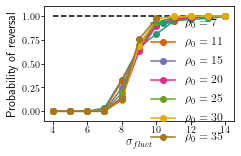

In [13]:
for rho0 in [7, 11, 15, 20, 25, 30, 35]:
    abs_rhof=np.sort(list(sample_rev_rho0[rho0]))
    ordo_prev=np.array(p_rev[rho0])[np.argsort(list(sample_rev_rho0[rho0]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\rho_0=%d$'%rho0)

plt.ylim(-0.1,1.1)

plt.hlines(1, 4, 14, color='k', linestyles='--')
plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

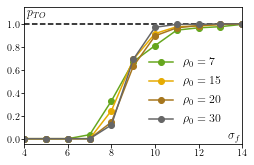

In [14]:
# plt.text(x=450, y=140, s=r'$\mathrm{(b)}$')
for p in range(4):
    plt.plot([], [])

for rho0 in [7, 15,  20, 30]:
    abs_rhof=np.sort(list(sample_rev_rho0[rho0]))
    ordo_prev=np.array(p_rev[rho0])[np.argsort(list(sample_rev_rho0[rho0]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\rho_0=%d$'%rho0)

plt.legend(loc=(0.55, 0.1))

plt.ylim(-0.05,1.15)
plt.xlim(4,14)
plt.hlines(1, 4, 14, color='k', linestyles='--')

plt.xlabel(r'$\sigma_f$', labelpad=-25, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$p_{TO}$', labelpad=-28, y=0.9, rotation=0, zorder=100);

plt.tight_layout(pad=0.01)
plt.savefig('TO_proba_rho0.pdf');

In [27]:
def fitTanh(x, x0, k):
    return(0.5*(1+np.tanh(k*(x-x0))))

In [34]:
popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))
popt

array([8.71450085, 1.3968106 ])

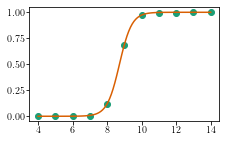

In [35]:
plt.plot(abs_rhof, ordo_prev, 'o')
x=np.linspace(4,14,100)
plt.plot(x, fitTanh(x, *popt))

In [39]:
sample_rev_rho0

{5: {4: array([0.03205, 0.0315 , 0.0293 , 0.03125, 0.0311 , 0.0304 , 0.03145,
         0.03205, 0.03305, 0.03185, 0.03065, 0.0303 , 0.031  , 0.03205,
         0.03   , 0.0295 , 0.029  , 0.03205, 0.0312 , 0.03045, 0.03075,
         0.0318 , 0.0302 , 0.03075, 0.02935, 0.029  , 0.03045, 0.03075,
         0.03295, 0.03145, 0.03045, 0.0315 , 0.0326 , 0.02865, 0.0311 ,
         0.02805, 0.032  , 0.03115, 0.03   , 0.0304 , 0.03145, 0.0308 ,
         0.03155, 0.0318 , 0.03   , 0.0317 , 0.03135, 0.03235, 0.03245,
         0.0305 , 0.03015, 0.0305 , 0.03055, 0.03335, 0.0288 , 0.0297 ,
         0.0288 , 0.0324 , 0.0286 , 0.03135, 0.0321 , 0.03065, 0.0316 ,
         0.03085, 0.03205, 0.02995, 0.0295 , 0.03225, 0.0319 , 0.02915,
         0.02895, 0.03095, 0.03105, 0.03075, 0.03175, 0.0312 , 0.03275,
         0.0332 , 0.03025, 0.02885, 0.02885, 0.03   , 0.032  , 0.0297 ,
         0.0301 , 0.03195, 0.02915, 0.03155, 0.03245, 0.0325 , 0.0328 ,
         0.0322 , 0.03165, 0.0318 , 0.03025, 0.03285, 0.03

In [43]:
list_x0_rho0=[]
for rho0 in list(sample_rev_rho0):
    try:
        abs_rhof=np.sort(list(sample_rev_rho0[rho0]))
        ordo_prev=np.array(p_rev[rho0])[np.argsort(list(sample_rev_rho0[rho0]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

        list_x0_rho0.append(popt[0])
    except:
        list_x0_rho0.append(np.nan)

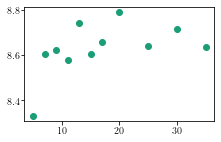

In [44]:
plt.plot(list(sample_rev_rho0), list_x0_rho0, 'o-')

# $\sigma_c$ at $\rho_f = 0.2 \rho_0$ varying $\beta$

In [91]:
list_beta=np.round(np.arange(1.8, 2.8, 0.05), 2)

list_sigmaf=np.arange(4, 15, 1)

In [92]:
sample_rev_beta={}

for beta in list_beta:

    sample_rev_beta[beta]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_beta[beta][sigmaf]=np.loadtxt('data_beta_sigmaf/beta%.2f/sigmaf%d/f_mag.dat'%(beta, sigmaf))
        except:
            print(beta,sigmaf)


2.3 14
2.35 4
2.35 5
2.35 6
2.35 7
2.35 8
2.35 9
2.35 10
2.35 11
2.35 12
2.35 13
2.35 14
2.45 4
2.45 5
2.45 6
2.45 7
2.45 8
2.45 9
2.45 10
2.45 11
2.45 12
2.45 13
2.45 14
2.5 4
2.5 5
2.5 6
2.5 7
2.5 8
2.5 9
2.5 10
2.5 11
2.5 12
2.5 13
2.5 14
2.55 4
2.55 5
2.55 6
2.55 7
2.55 8
2.55 9
2.55 10
2.55 11
2.55 12
2.55 13
2.55 14
2.65 4
2.65 5
2.65 6
2.65 7
2.65 8
2.65 9
2.65 10
2.65 11
2.65 12
2.65 13
2.65 14
2.7 4
2.7 5
2.7 6
2.7 7
2.7 8
2.7 9
2.7 10
2.7 11
2.7 12
2.7 13
2.7 14
2.75 4
2.75 5
2.75 6
2.75 7
2.75 8
2.75 9
2.75 10
2.75 11
2.75 12
2.75 13
2.75 14


In [93]:
p_rev={beta:[np.mean(np.array(sample_rev_beta[beta][s])>0.01) for s in sample_rev_beta[beta]] for beta in list_beta}

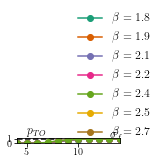

In [94]:
for beta in list_beta[::3]:
    abs_rhof=np.sort(list(sample_rev_beta[beta]))
    ordo_prev=np.array(p_rev[beta])[np.argsort(list(sample_rev_beta[beta]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\beta=%.1f$'%beta)


plt.legend(loc=(0.55, 0.1))

plt.ylim(-0.05,1.15)
plt.xlim(4,14)
plt.hlines(1, 4, 14, color='k', linestyles='--')

plt.xlabel(r'$\sigma_f$', labelpad=-25, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$p_{TO}$', labelpad=-28, y=0.9, rotation=0, zorder=100);

plt.tight_layout(pad=0.01)
plt.savefig('TO_proba_beta.pdf');

In [95]:
list_x0_beta=[]
list_abs_beta=[]
for beta in list(sample_rev_beta):
    try:
        abs_rhof=np.sort(list(sample_rev_beta[beta]))
        ordo_prev=np.array(p_rev[beta])[np.argsort(list(sample_rev_beta[beta]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

        list_x0_beta.append(popt[0])
        list_abs_beta.append(beta)
    except:
        pass

In [96]:
list_x0_beta=[]
list_abs_beta=[]
for beta in list(sample_rev_beta):
    abs_rhof=np.sort(list(sample_rev_beta[beta]))
    ordo_prev=np.array(p_rev[beta])[np.argsort(list(sample_rev_beta[beta]))]

    popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

    list_x0_beta.append(popt[0])
    list_abs_beta.append(beta)


ValueError: `ydata` must not be empty!

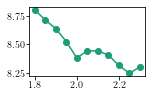

In [97]:
plt.plot(list_abs_beta, list_x0_beta, 'o-')

In [34]:
data=np.zeros((len(list_abs_beta),2))

In [37]:
data[:,0]=1/np.array(list_abs_beta)
data

array([[0.55555556, 0.        ],
       [0.54054054, 0.        ],
       [0.52631579, 0.        ],
       [0.51282051, 0.        ],
       [0.5       , 0.        ],
       [0.48780488, 0.        ],
       [0.47619048, 0.        ],
       [0.46511628, 0.        ],
       [0.45454545, 0.        ],
       [0.44444444, 0.        ],
       [0.43478261, 0.        ],
       [0.41666667, 0.        ],
       [0.38461538, 0.        ]])

In [38]:
data[:,1]=list_x0_beta
data

array([[0.55555556, 8.80384171],
       [0.54054054, 8.71610489],
       [0.52631579, 8.63952322],
       [0.51282051, 8.52562136],
       [0.5       , 8.38170719],
       [0.48780488, 8.44355741],
       [0.47619048, 8.44438992],
       [0.46511628, 8.40697487],
       [0.45454545, 8.31604189],
       [0.44444444, 8.24709599],
       [0.43478261, 8.30413039],
       [0.41666667, 8.12736125],
       [0.38461538, 8.17256949]])

In [39]:
np.savetxt('data_fig1_panel2b.dat', data, header='T r_c')

# $\sigma_c$ at $\rho_f = 0.2 \rho_0$ varying $D$

In [40]:
list_D=np.round(np.arange(0.4,2.2,0.2), 1)

list_sigmaf=np.arange(4, 15, 1)

In [41]:
sample_rev_D={}

for D in list_D:

    sample_rev_D[D]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_D[D][sigmaf]=np.loadtxt('data_D_sigmaf/D%.1f/sigmaf%d/f_mag.dat'%(D, sigmaf))
        except:
            print(D,sigmaf)


1.6 14
1.8 12
2.0 4
2.0 5
2.0 6
2.0 7
2.0 8
2.0 9
2.0 10
2.0 11
2.0 12
2.0 13
2.0 14


In [42]:
p_rev_D={D:[np.mean(np.array(sample_rev_D[D][s])>0.01) for s in sample_rev_D[D]] for D in list_D}

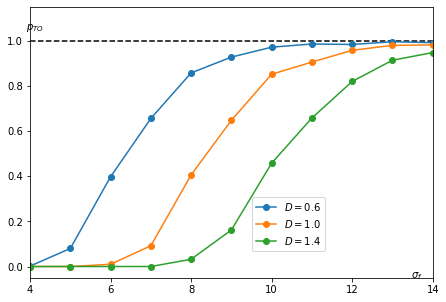

In [43]:
for D in [0.6, 1.0, 1.4]:
    abs_rhof=np.sort(list(sample_rev_D[D]))
    ordo_prev=np.array(p_rev_D[D])[np.argsort(list(sample_rev_D[D]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$D=%.1f$'%D)


plt.legend(loc=(0.55, 0.1))

plt.ylim(-0.05,1.15)
plt.xlim(4,14)
plt.hlines(1, 4, 14, color='k', linestyles='--')

plt.xlabel(r'$\sigma_f$', labelpad=-25, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$p_{TO}$', labelpad=-28, y=0.9, rotation=0, zorder=100);

plt.tight_layout(pad=0.01)
plt.savefig('TO_proba_D.pdf');

In [44]:
list_x0_D=[]
for D in list(sample_rev_D):
    try:
        abs_rhof=np.sort(list(sample_rev_D[D]))
        ordo_prev=np.array(p_rev_D[D])[np.argsort(list(sample_rev_D[D]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

        list_x0_D.append(popt[0])
    except:
        list_x0_D.append(np.nan)

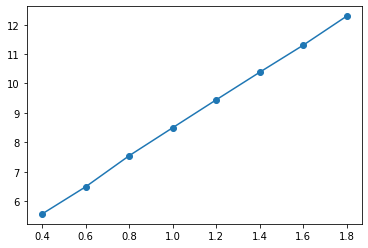

In [45]:
plt.plot(list(sample_rev_D), list_x0_D, 'o-')

In [46]:
data=np.zeros((len(list(sample_rev_D)),2))

In [47]:
data[:,0]=list(sample_rev_D)
data

array([[0.4, 0. ],
       [0.6, 0. ],
       [0.8, 0. ],
       [1. , 0. ],
       [1.2, 0. ],
       [1.4, 0. ],
       [1.6, 0. ],
       [1.8, 0. ],
       [2. , 0. ]])

In [48]:
data[:,1]=list_x0_D
data

array([[ 0.4       ,  5.56264223],
       [ 0.6       ,  6.48566008],
       [ 0.8       ,  7.54166763],
       [ 1.        ,  8.4935052 ],
       [ 1.2       ,  9.44185625],
       [ 1.4       , 10.3802487 ],
       [ 1.6       , 11.29948528],
       [ 1.8       , 12.28785642],
       [ 2.        ,         nan]])

In [49]:
np.savetxt('data_fig1_panel2c.dat', data, header='D r_c')

# $\sigma_c$ at $\rho_f = 0.2 \rho_0$ varying $v$

{0.5: [0.0, 0.0, 0.0, 0.0, 0.004, 0.016, 0.066, 0.202, 0.434, 0.656, 0.766],
 1.0: [0.0, 0.0, 0.01, 0.112, 0.39, 0.7, 0.834, 0.92, 0.96, 0.972, 0.982],
 1.5: [0.0, 0.0, 0.084, 0.392, 0.746, 0.888, 0.952, 0.962, 0.99, 0.998, 0.996],
 2.0: [0.0, 0.014, 0.148, 0.528, 0.786, 0.93, 0.942, 0.988, 0.994, 1.0, 0.994],
 2.5: [0.0, 0.018, 0.2, 0.578, 0.842, 0.946, 0.974, 0.996, 0.998, 0.998, 1.0],
 3.0: [0.0, 0.006, 0.196, 0.578, 0.852, 0.956, 0.986, 0.996, 1.0, 1.0, 1.0],
 3.5: [0.0, 0.012, 0.228, 0.596, 0.844, 0.968, 0.976, 0.996, 1.0, 0.998, 1.0]}

In [53]:
list_v=np.round(np.arange(0.4,4.0,0.1),1)

list_sigmaf=np.arange(4, 15, 1)

In [54]:
sample_rev_v={}

for v in list_v:

    sample_rev_v[v]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_v[v][sigmaf]=np.loadtxt('data_v_sigmaf/v%.1f/sigmaf%d/f_mag.dat'%(v, sigmaf))
        except:
            print(v,sigmaf)


0.7 4
0.7 5
0.7 6
0.7 7
0.7 8
0.7 9
0.7 10
0.7 11
0.7 12
0.7 13
0.7 14
0.8 14
0.9 4
0.9 5
0.9 6
0.9 7
0.9 8
0.9 9
0.9 10
0.9 11
0.9 12
0.9 13
0.9 14
1.1 4
1.1 5
1.1 6
1.1 7
1.1 8
1.1 9
1.1 10
1.1 11
1.1 12
1.1 13
1.1 14
1.3 4
1.3 5
1.3 6
1.3 7
1.3 8
1.3 9
1.3 10
1.3 11
1.3 12
1.3 13
1.3 14
1.7 4
1.7 5
1.7 6
1.7 7
1.7 8
1.7 9
1.7 10
1.7 11
1.7 12
1.7 13
1.7 14
1.9 4
1.9 5
1.9 6
1.9 7
1.9 8
1.9 9
1.9 10
1.9 11
1.9 12
1.9 13
1.9 14
2.1 4
2.1 5
2.1 6
2.1 7
2.1 8
2.1 9
2.1 10
2.1 11
2.1 12
2.1 13
2.1 14
2.2 12
2.2 13
2.2 14
2.3 4
2.3 5
2.3 6
2.3 7
2.3 8
2.3 9
2.3 10
2.3 11
2.3 12
2.3 13
2.3 14
2.4 4
2.4 5
2.4 6
2.4 7
2.4 8
2.4 9
2.4 10
2.4 11
2.4 12
2.4 13
2.4 14
2.6 4
2.6 5
2.6 6
2.6 7
2.6 8
2.6 9
2.6 10
2.6 11
2.6 12
2.6 13
2.6 14
2.7 4
2.7 5
2.7 6
2.7 7
2.7 8
2.7 9
2.7 10
2.7 11
2.7 12
2.7 13
2.7 14
2.8 4
2.8 5
2.8 6
2.8 7
2.8 8
2.8 9
2.8 10
2.8 11
2.8 12
2.8 13
2.8 14
2.9 4
2.9 5
2.9 6
2.9 7
2.9 8
2.9 9
2.9 10
2.9 11
2.9 12
2.9 13
2.9 14
3.1 4
3.1 5
3.1 6
3.1 7
3.1 8
3.1 9
3.1 10
3.1 11

In [55]:
p_rev_v={v:[np.mean(np.array(sample_rev_v[v][s])>0.01) for s in sample_rev_v[v]] for v in list_v}

In [56]:
for v in list_v:
    abs_rhof=np.sort(list(sample_rev_v[v]))
    ordo_prev=np.array(p_rev[v])[np.argsort(list(sample_rev_v[v]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$v=%.1f$'%v)

plt.ylim(-0.05,1.05)
#plt.xlim(4,14)
#plt.hlines(1, 4, 14, color='k', linestyles='--')

#plt.hlines([0.2, 0.5, 0.8], 4, 14, color='k', linestyles='--')

    
#plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

KeyError: 0.4

In [57]:
list_x0_v=[]
list_abs_v=[]

for v in list(sample_rev_v):
    try:
        abs_rhof=np.sort(list(sample_rev_v[v]))
        ordo_prev=np.array(p_rev_v[v])[np.argsort(list(sample_rev_v[v]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

        list_x0_v.append(popt[0])
        list_abs_v.append(v)
    except:
        pass

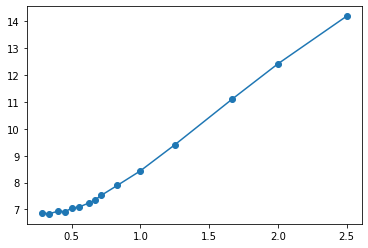

In [58]:
plt.plot(1/np.array(list_abs_v), list_x0_v, 'o-')

In [59]:
data=np.zeros((len(list(list_x0_v)),2))

In [60]:
data[:,0]=list(list_abs_v)
data

array([[0.4, 0. ],
       [0.5, 0. ],
       [0.6, 0. ],
       [0.8, 0. ],
       [1. , 0. ],
       [1.2, 0. ],
       [1.4, 0. ],
       [1.5, 0. ],
       [1.6, 0. ],
       [1.8, 0. ],
       [2. , 0. ],
       [2.2, 0. ],
       [2.5, 0. ],
       [3. , 0. ],
       [3.5, 0. ]])

In [61]:
data[:,1]=list_x0_v
data

array([[ 0.4       , 14.18627181],
       [ 0.5       , 12.41401671],
       [ 0.6       , 11.09917799],
       [ 0.8       ,  9.40376053],
       [ 1.        ,  8.43638784],
       [ 1.2       ,  7.89893162],
       [ 1.4       ,  7.52217505],
       [ 1.5       ,  7.34043277],
       [ 1.6       ,  7.24159833],
       [ 1.8       ,  7.09379199],
       [ 2.        ,  7.05181649],
       [ 2.2       ,  6.92053677],
       [ 2.5       ,  6.93679757],
       [ 3.        ,  6.83563254],
       [ 3.5       ,  6.87863629]])

In [62]:
np.savetxt('data_v_rc.dat', data, header='v r_c')

# Propagating droplet

In [11]:
list_t=np.array([200,400,600,800])

In [12]:
f_m={}
for t in list_t:
    f_m[t]=np.load("f_m_t%d.npy"%t)

FileNotFoundError: [Errno 2] No such file or directory: 'f_m_t200.npy'

In [13]:
lx=3000
prof_m=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/destab_liqp_blob_films/data_prof_article_rho10/i0/f_profiles_m.dat', sep=' ', names=np.arange(lx), index_col=False)


In [14]:
prof_rho=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/destab_liqp_blob_films/data_prof_article_rho10/i0/f_profiles_rho.dat', sep=' ', names=np.arange(lx), index_col=False)


In [15]:
f_m={}
f_rho={}

for t in range(5):
    f_m[t*200]=-prof_m.values[500*t:500*(t+1),::-1]
    f_rho[t*200]=prof_rho.values[500*t:500*(t+1),::-1]

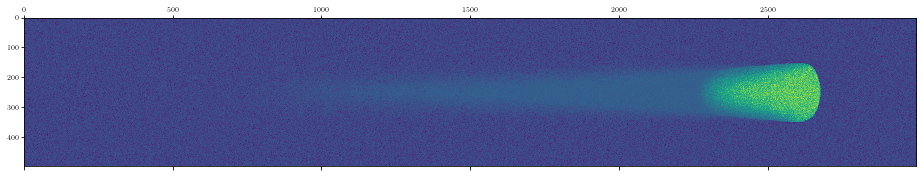

In [553]:
t=800
plt.matshow(f_m[t])

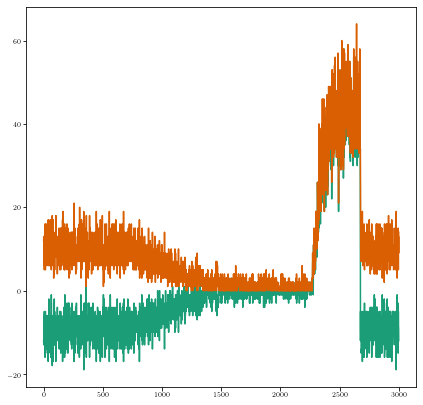

In [546]:
plt.figure(figsize=(7,7))
plt.plot(f_m[t][250,:])
plt.plot(f_rho[t][250,:])


In [547]:
np.mean(f_rho[t][250,1500:2000])

1.36

In [431]:
from scipy.ndimage import uniform_filter

In [435]:
avg_prof=uniform_filter(Z, size=4, mode='constant')

In [440]:
avg_prof.shape

(800, 1500)

In [444]:
Y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [797, 797, 797, ..., 797, 797, 797],
       [798, 798, 798, ..., 798, 798, 798],
       [799, 799, 799, ..., 799, 799, 799]])

(7700, 8000)

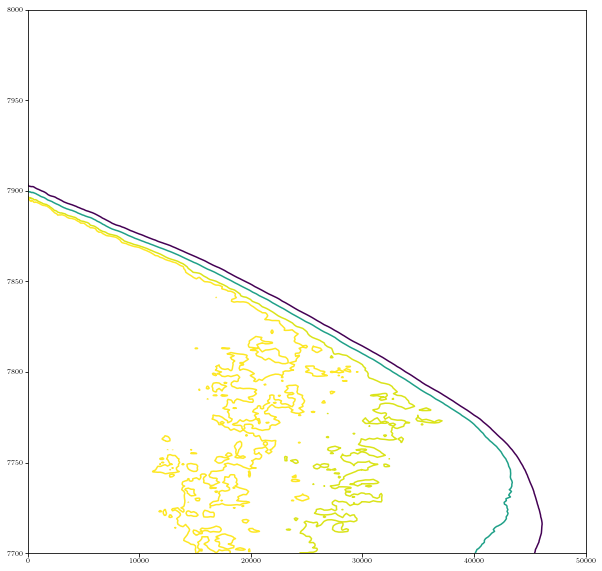

In [459]:
plt.figure(figsize=(10,10))

plt.contour((Y.T)**2, X.T, np.roll(avg_prof.T, -400), levels=[1, 4, 6, 6.3])
plt.xlim(0,50000)
plt.ylim(7700,8000)

# Panel Fig. 1

In [40]:
fig_width_pt = 246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [500]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

ntop=16 # to be adjust in order to match white and 0-magnetization

top = cm.get_cmap('PuBu_r', 128)
bottom = cm.get_cmap('YlOrBr', 128)
middle = (1,1,1,1)
newcolors = np.vstack((top(np.linspace(0, 1, ntop)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

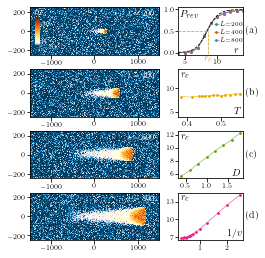

In [523]:
fig, ax = plt.subplots(4, 2, 
                       gridspec_kw={
                           'height_ratios': [1, 1, 1, 1],
                           'width_ratios': [2, 1]})

ax_d1=ax[0][0]
ax_d2=ax[1][0]
ax_d3=ax[2][0]
ax_d4=ax[3][0]

ax_L=ax[0][1]
ax_beta=ax[1][1]
ax_D=ax[2][1]
ax_v=ax[3][1]

v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

extent=[-f_m[200].shape[1]/2., f_m[200].shape[1]/2., -f_m[200].shape[0]/2., f_m[200].shape[0]/2. ]
vmin=-10
vmax=70

##################### Droplet t=200 ##########################
#ax_d1.text(s=r'$\mathrm{(a)}$', x=0.45, y=ylab, transform=ax_d1.transAxes)

t=200
ax_d1.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d1.imshow(f_m[t], cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)

ax_d1.set_xticks([-1000,0,1000])

inset_ax = inset_axes(ax_d1,
                          height="61%", # set height
                          width="4%", # and width
                          loc=6,
                          #bbox_to_anchor=(75,130, 100, 100)
                     )

cbar=plt.colorbar(pcm, fraction=0.1, ticks=[-10, 0, +50], cax = inset_ax, 
                  orientation='vertical',
                    drawedges=False)

cbar.outline.set_visible(False)
cbar.ax.tick_params(size=1, color='w')
cbar_yticks = plt.getp(cbar.ax.axes, 'yticklabels')
plt.setp(cbar_yticks, color='w')

cbar.ax.set_ylabel(r'$m$', rotation=0, labelpad=-18, y=1.3, color="w")

##################### Droplet t=400 ##########################
#ax_d2.text(s=r'$\mathrm{(b)}$', x=0.45, y=ylab, transform=ax_d2.transAxes)

t=400
ax_d2.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d2.imshow(f_m[t], cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)
ax_d2.set_xticks([-1000,0,1000])

##################### Droplet t=600 ##########################
#ax_d3.text(s=r'$\mathrm{(c)}$', x=0.45, y=ylab, transform=ax_d3.transAxes)

t=600
ax_d3.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d3.imshow(f_m[t], cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)
ax_d3.set_xticks([-1000,0,1000])

##################### Droplet t=800 ##########################
#ax_d4.text(s=r'$\mathrm{(d)}$', x=0.45, y=ylab, transform=ax_d4.transAxes)

t=800
ax_d4.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d4.imshow(f_m[t], cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)
ax_d4.set_xticks([-1000,0,1000])


##################### Tanh L ##########################
ax_L.text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=ax_L.transAxes)

for L in [200, 400, 800]:
    abs_rhof=np.sort(list(sample_rev_L[L]))
    ordo_prev=np.array(p_rev_L[L])[np.argsort(list(sample_rev_L[L]))]
    ax_L.plot(abs_rhof, ordo_prev, '-o', label=r'$L\kern-0.3em=\kern-0.3em%d$'%L, markersize=1.8, linewidth=0.5)

popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(7, 5))
absx=np.linspace(4,14,1000)
ax_L.plot(absx, fitTanh(absx, *popt), 'k--', linewidth=0.8)

lcol='goldenrod'
ax_L.hlines(0.5,4,8.5,linestyle='--', color=lcol, linewidth=0.8, zorder=10)
ax_L.vlines(8.5,-1,0.5,linestyle='--', color=lcol, linewidth=0.8, zorder=10)
ax_L.text(s=r'$r_c$', x=8., y=-0.21, color=lcol)

ax_L.legend(loc=(0.51, 0.20), fontsize=6, handlelength=0.8, labelspacing=0.4, handletextpad=0.15 )

ax_L.set_ylim(-0.05,1.05)
ax_L.set_xlim(4,14)

ax_L.set_xlabel(r'$r$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_L.set_ylabel(r'$P_{\rm rev}$', labelpad=-25, y=0.73, rotation=0, zorder=100);

##################### r_c beta ##########################
ax_beta.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=ax_beta.transAxes)

ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])

ax_beta.plot(1/np.array(list_abs_beta), list_x0_beta, 'o-', markersize=1.8, linewidth=0.5)

ax_beta.set_xlabel(r'$T$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_beta.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_beta.set_ylim(4, 14)

##################### r_c D ##########################
ax_D.text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=ax_D.transAxes)

ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot(list(sample_rev_D), list_x0_D, 'o-', markersize=1.8, linewidth=0.5)

ax_D.set_xlabel(r'$D$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_D.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_D.set_yticks([6, 8, 10, 12])


##################### r_c v ##########################
ax_v.text(s=r'$\mathrm{(d)}$', x=xlab, y=ylab, transform=ax_v.transAxes)

ax_v.plot([], [])
ax_v.plot([], [])
ax_v.plot([], [])

ax_v.plot(1/np.array(list_abs_v), list_x0_v, 'o-', markersize=1.8, linewidth=0.5)

ax_v.set_xlabel(r'$1/v$', labelpad=-22, x=0.86, rotation=0, zorder=100);
ax_v.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

#ax_v.set_xlim(0.4,2.5)

ax_v.set_yticks([7, 10, 13])


##################### OUTPUT ##########################


plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.07, right=0.94, top=0.99, bottom=0.04)

plt.savefig('panel_fig1_v1.pdf', dpi=400);


# Panel Fig. 1 $m/\rho_0$

In [49]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

ntop=16 # to be adjust in order to match white and 0-magnetization

top = cm.get_cmap('PuBu_r', 128)
bottom = cm.get_cmap('YlOrBr', 128)
middle = (1,1,1,1)
newcolors = np.vstack((top(np.linspace(0, 1, ntop)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [50]:
def fitTanh(x, x0, k):
    return(0.5*(1+np.tanh(k*(x-x0))))

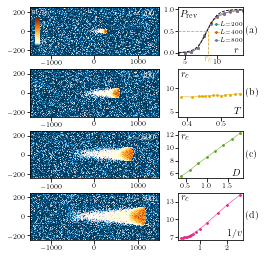

In [43]:
fig, ax = plt.subplots(4, 2, 
                       gridspec_kw={
                           'height_ratios': [1, 1, 1, 1],
                           'width_ratios': [2, 1]})

ax_d1=ax[0][0]
ax_d2=ax[1][0]
ax_d3=ax[2][0]
ax_d4=ax[3][0]

ax_L=ax[0][1]
ax_beta=ax[1][1]
ax_D=ax[2][1]
ax_v=ax[3][1]

v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

extent=[-f_m[200].shape[1]/2., f_m[200].shape[1]/2., -f_m[200].shape[0]/2., f_m[200].shape[0]/2. ]
vmin=-1
vmax=7

##################### Droplet t=200 ##########################
#ax_d1.text(s=r'$\mathrm{(a)}$', x=0.45, y=ylab, transform=ax_d1.transAxes)

t=200
ax_d1.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d1.imshow(f_m[t]/10, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)

ax_d1.set_xticks([-1000,0,1000])

inset_ax = inset_axes(ax_d1,
                          height="61%", # set height
                          width="4%", # and width
                          loc=6,
                          #bbox_to_anchor=(75,130, 100, 100)
                     )

cbar=plt.colorbar(pcm, fraction=0.1, ticks=[-1, 0, +5], cax = inset_ax, 
                  orientation='vertical',
                    drawedges=False)

cbar.outline.set_visible(False)
cbar.ax.tick_params(size=1, color='w')
cbar_yticks = plt.getp(cbar.ax.axes, 'yticklabels')
plt.setp(cbar_yticks, color='w')

cbar.ax.set_ylabel(r'$m/\rho_0$', rotation=0, labelpad=-12, y=1.25, color="w", fontsize=7)

##################### Droplet t=400 ##########################
#ax_d2.text(s=r'$\mathrm{(b)}$', x=0.45, y=ylab, transform=ax_d2.transAxes)

t=400
ax_d2.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d2.imshow(f_m[t]/10, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)
ax_d2.set_xticks([-1000,0,1000])

##################### Droplet t=600 ##########################
#ax_d3.text(s=r'$\mathrm{(c)}$', x=0.45, y=ylab, transform=ax_d3.transAxes)

t=600
ax_d3.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d3.imshow(f_m[t]/10, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)
ax_d3.set_xticks([-1000,0,1000])

##################### Droplet t=800 ##########################
#ax_d4.text(s=r'$\mathrm{(d)}$', x=0.45, y=ylab, transform=ax_d4.transAxes)

t=800
ax_d4.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d4.imshow(f_m[t]/10, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)
ax_d4.set_xticks([-1000,0,1000])


##################### Tanh L ##########################
ax_L.text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=ax_L.transAxes)

for L in [200, 400, 800]:
    abs_rhof=np.sort(list(sample_rev_L[L]))
    ordo_prev=np.array(p_rev_L[L])[np.argsort(list(sample_rev_L[L]))]
    ax_L.plot(abs_rhof, ordo_prev, '-o', label=r'$L\kern-0.3em=\kern-0.3em%d$'%L, markersize=1.8, linewidth=0.5)

popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(7, 5))
absx=np.linspace(4,14,1000)
ax_L.plot(absx, fitTanh(absx, *popt), 'k--', linewidth=0.8)

lcol='goldenrod'
ax_L.hlines(0.5,4,8.5,linestyle='--', color=lcol, linewidth=0.8, zorder=10)
ax_L.vlines(8.5,-1,0.5,linestyle='--', color=lcol, linewidth=0.8, zorder=10)
ax_L.text(s=r'$r_c$', x=8., y=-0.21, color=lcol)

ax_L.legend(loc=(0.51, 0.20), fontsize=6, handlelength=0.8, labelspacing=0.4, handletextpad=0.15 )

ax_L.set_ylim(-0.05,1.05)
ax_L.set_xlim(4,14)

ax_L.set_xlabel(r'$r$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_L.set_ylabel(r'$P_{\rm rev}$', labelpad=-25, y=0.73, rotation=0, zorder=100);

##################### r_c beta ##########################
ax_beta.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=ax_beta.transAxes)

ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])

ax_beta.plot(1/np.array(list_abs_beta), list_x0_beta, 'o-', markersize=1.8, linewidth=0.5)

ax_beta.set_xlabel(r'$T$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_beta.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_beta.set_ylim(4, 14)

##################### r_c D ##########################
ax_D.text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=ax_D.transAxes)

ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot(list(sample_rev_D), list_x0_D, 'o-', markersize=1.8, linewidth=0.5)

ax_D.set_xlabel(r'$D$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_D.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_D.set_yticks([6, 8, 10, 12])


##################### r_c v ##########################
ax_v.text(s=r'$\mathrm{(d)}$', x=xlab, y=ylab, transform=ax_v.transAxes)

ax_v.plot([], [])
ax_v.plot([], [])
ax_v.plot([], [])

ax_v.plot(1/np.array(list_abs_v), list_x0_v, 'o-', markersize=1.8, linewidth=0.5)

ax_v.set_xlabel(r'$1/v$', labelpad=-22, x=0.86, rotation=0, zorder=100);
ax_v.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

#ax_v.set_xlim(0.4,2.5)

ax_v.set_yticks([7, 10, 13])


##################### OUTPUT ##########################


plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.07, right=0.94, top=0.99, bottom=0.04)

plt.savefig('panel_fig1_v1.pdf', dpi=400);


## Panel 1  Fig. 1 $m/\rho_0$

In [55]:
fig_width_pt = (2/3)*246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 246
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

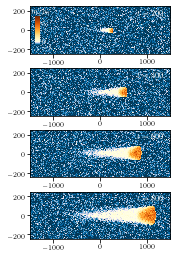

In [59]:
fig, ax = plt.subplots(4, 1, 
                       gridspec_kw={
                           'height_ratios': [1, 1, 1, 1],
                           'width_ratios': [2]})

ax_d1=ax[0]
ax_d2=ax[1]
ax_d3=ax[2]
ax_d4=ax[3]


v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

extent=[-f_m[200].shape[1]/2., f_m[200].shape[1]/2., -f_m[200].shape[0]/2., f_m[200].shape[0]/2. ]
vmin=-1
vmax=7

##################### Droplet t=200 ##########################
#ax_d1.text(s=r'$\mathrm{(a)}$', x=0.45, y=ylab, transform=ax_d1.transAxes)

t=200
ax_d1.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d1.imshow(f_m[t]/10, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)

ax_d1.set_xticks([-1000,0,1000])

inset_ax = inset_axes(ax_d1,
                          height="61%", # set height
                          width="4%", # and width
                          loc=6,
                          #bbox_to_anchor=(75,130, 100, 100)
                     )

cbar=plt.colorbar(pcm, fraction=0.1, ticks=[-1, 0, +5], cax = inset_ax, 
                  orientation='vertical',
                    drawedges=False)

cbar.outline.set_visible(False)
cbar.ax.tick_params(size=1, color='w')
cbar_yticks = plt.getp(cbar.ax.axes, 'yticklabels')
plt.setp(cbar_yticks, color='w')

cbar.ax.set_ylabel(r'$m/\rho_0$', rotation=0, labelpad=-12, y=1.25, color="w", fontsize=7)

##################### Droplet t=400 ##########################
#ax_d2.text(s=r'$\mathrm{(b)}$', x=0.45, y=ylab, transform=ax_d2.transAxes)

t=400
ax_d2.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d2.imshow(f_m[t]/10, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)
ax_d2.set_xticks([-1000,0,1000])

##################### Droplet t=600 ##########################
#ax_d3.text(s=r'$\mathrm{(c)}$', x=0.45, y=ylab, transform=ax_d3.transAxes)

t=600
ax_d3.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d3.imshow(f_m[t]/10, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)
ax_d3.set_xticks([-1000,0,1000])

##################### Droplet t=800 ##########################
#ax_d4.text(s=r'$\mathrm{(d)}$', x=0.45, y=ylab, transform=ax_d4.transAxes)

t=800
ax_d4.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=8, color="w")

pcm=ax_d4.imshow(f_m[t]/10, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, extent=extent)
ax_d4.set_xticks([-1000,0,1000])

##################### OUTPUT ##########################


plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.13, right=0.99, top=0.99, bottom=0.04)

plt.savefig('panel1_fig1_v1.pdf', dpi=400);


## Panel 2  Fig. 1 $m/\rho_0$

In [70]:
fig_width_pt = (1.1/3)*246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 246
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

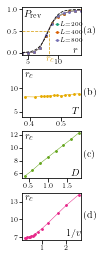

In [73]:
fig, ax = plt.subplots(4, 1, 
                       gridspec_kw={
                           'height_ratios': [1, 1, 1, 1],
                           'width_ratios': [1]})

# ax_d1=ax[0][0]
# ax_d2=ax[1][0]
# ax_d3=ax[2][0]
# ax_d4=ax[3][0]

ax_L=ax[0]
ax_beta=ax[1]
ax_D=ax[2]
ax_v=ax[3]

v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

##################### Tanh L ##########################
ax_L.text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=ax_L.transAxes)

for L in [200, 400, 800]:
    abs_rhof=np.sort(list(sample_rev_L[L]))
    ordo_prev=np.array(p_rev_L[L])[np.argsort(list(sample_rev_L[L]))]
    ax_L.plot(abs_rhof, ordo_prev, '-o', label=r'$L\kern-0.3em=\kern-0.3em%d$'%L, markersize=1.8, linewidth=0.5)

popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(7, 5))
absx=np.linspace(4,14,1000)
ax_L.plot(absx, fitTanh(absx, *popt), 'k--', linewidth=0.8)

lcol='goldenrod'
ax_L.hlines(0.5,4,8.5,linestyle='--', color=lcol, linewidth=0.8, zorder=10)
ax_L.vlines(8.5,-1,0.5,linestyle='--', color=lcol, linewidth=0.8, zorder=10)
ax_L.text(s=r'$r_c$', x=8., y=-0.21, color=lcol)

ax_L.legend(loc=(0.51, 0.20), fontsize=6, handlelength=0.8, labelspacing=0.4, handletextpad=0.15 )

ax_L.set_ylim(-0.05,1.05)
ax_L.set_xlim(4,14)

ax_L.set_xlabel(r'$r$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_L.set_ylabel(r'$P_{\rm rev}$', labelpad=-25, y=0.73, rotation=0, zorder=100);

##################### r_c beta ##########################
ax_beta.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=ax_beta.transAxes)

ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])

ax_beta.plot(1/np.array(list_abs_beta), list_x0_beta, 'o-', markersize=1.8, linewidth=0.5)

ax_beta.set_xlabel(r'$T$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_beta.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_beta.set_ylim(4, 14)

##################### r_c D ##########################
ax_D.text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=ax_D.transAxes)

ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot(list(sample_rev_D), list_x0_D, 'o-', markersize=1.8, linewidth=0.5)

ax_D.set_xlabel(r'$D$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_D.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_D.set_yticks([6, 8, 10, 12])


##################### r_c v ##########################
ax_v.text(s=r'$\mathrm{(d)}$', x=xlab, y=ylab, transform=ax_v.transAxes)

ax_v.plot([], [])
ax_v.plot([], [])
ax_v.plot([], [])

ax_v.plot(1/np.array(list_abs_v), list_x0_v, 'o-', markersize=1.8, linewidth=0.5)

ax_v.set_xlabel(r'$1/v$', labelpad=-22, x=0.86, rotation=0, zorder=100);
ax_v.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

#ax_v.set_xlim(0.4,2.5)

ax_v.set_yticks([7, 10, 13])


##################### OUTPUT ##########################


plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.17, right=0.83, top=0.99, bottom=0.04)

plt.savefig('panel2_fig1_v1.pdf', dpi=400);


## Panel 2a  Fig. 1 $m/\rho_0$

In [83]:
fig_width_pt = (1.2/3)*246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 246/4
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

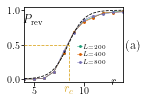

In [51]:
v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

ax_L=plt.subplot()

##################### Tanh L ##########################
ax_L.text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=ax_L.transAxes)

for L in [200, 400, 800]:
    abs_rhof=np.sort(list(sample_rev_L[L]))
    ordo_prev=np.array(p_rev_L[L])[np.argsort(list(sample_rev_L[L]))]
    ax_L.plot(abs_rhof, ordo_prev, '-o', label=r'$L\kern-0.3em=\kern-0.3em%d$'%L, markersize=1.8, linewidth=0.5)

popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(7, 5))
absx=np.linspace(4,14,1000)
ax_L.plot(absx, fitTanh(absx, *popt), 'k--', linewidth=0.8)

lcol='goldenrod'
ax_L.hlines(0.5,4,8.5,linestyle='--', color=lcol, linewidth=0.8, zorder=10)
ax_L.vlines(8.5,-1,0.5,linestyle='--', color=lcol, linewidth=0.8, zorder=10)
ax_L.text(s=r'$r_c$', x=8., y=-0.21, color=lcol)

ax_L.legend(loc=(0.51, 0.20), fontsize=6, handlelength=0.8, labelspacing=0.4, handletextpad=0.15 )

ax_L.set_ylim(-0.05,1.05)
ax_L.set_xlim(4,14)

ax_L.set_xlabel(r'$r$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_L.set_ylabel(r'$P_{\rm rev}$', labelpad=-25, y=0.73, rotation=0, zorder=100);

plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.17, right=0.83, top=0.99, bottom=0.17)

plt.savefig('panel2a_fig1_v1.pdf', dpi=400);


## Panel 2b  Fig. 1 $m/\rho_0$

In [83]:
fig_width_pt = (1.2/3)*246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 246/4
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

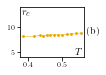

In [85]:
v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

ax_beta=plt.subplot()

##################### r_c beta ##########################
ax_beta.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=ax_beta.transAxes)

ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])

ax_beta.plot(1/np.array(list_abs_beta), list_x0_beta, 'o-', markersize=1.8, linewidth=0.5)

ax_beta.set_xlabel(r'$T$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_beta.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_beta.set_ylim(4, 14)

##################### r_c D ##########################
ax_D.text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=ax_D.transAxes)

ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot(list(sample_rev_D), list_x0_D, 'o-', markersize=1.8, linewidth=0.5)

ax_D.set_xlabel(r'$D$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_D.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_D.set_yticks([6, 8, 10, 12])

plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.17, right=0.83, top=0.99, bottom=0.17)

plt.savefig('panel2b_fig1_v1.pdf', dpi=400);


## Panel 2c  Fig. 1 $m/\rho_0$

In [83]:
fig_width_pt = (1.2/3)*246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 246/4
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

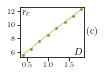

In [87]:
v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

ax_D=plt.subplot()

##################### r_c D ##########################
ax_D.text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=ax_D.transAxes)

ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot(list(sample_rev_D), list_x0_D, 'o-', markersize=1.8, linewidth=0.5)

ax_D.set_xlabel(r'$D$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_D.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_D.set_yticks([6, 8, 10, 12])

plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.17, right=0.83, top=0.99, bottom=0.17)

plt.savefig('panel2c_fig1_v1.pdf', dpi=400);


## Panel 2c  Fig. 1 $m/\rho_0$

In [83]:
fig_width_pt = (1.2/3)*246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 246/4
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

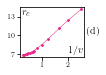

In [88]:
v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

ax_v=plt.subplot()

ax_v.text(s=r'$\mathrm{(d)}$', x=xlab, y=ylab, transform=ax_v.transAxes)

ax_v.plot([], [])
ax_v.plot([], [])
ax_v.plot([], [])

ax_v.plot(1/np.array(list_abs_v), list_x0_v, 'o-', markersize=1.8, linewidth=0.5)

ax_v.set_xlabel(r'$1/v$', labelpad=-22, x=0.86, rotation=0, zorder=100);
ax_v.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

#ax_v.set_xlim(0.4,2.5)

ax_v.set_yticks([7, 10, 13])

plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.17, right=0.83, top=0.99, bottom=0.17)

plt.savefig('panel2d_fig1_v1.pdf', dpi=400);


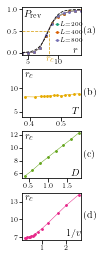

In [73]:
fig, ax = plt.subplots(4, 1, 
                       gridspec_kw={
                           'height_ratios': [1, 1, 1, 1],
                           'width_ratios': [1]})

# ax_d1=ax[0][0]
# ax_d2=ax[1][0]
# ax_d3=ax[2][0]
# ax_d4=ax[3][0]

ax_L=ax[0]
ax_beta=ax[1]
ax_D=ax[2]
ax_v=ax[3]

v0=7
xtime=780
ytime=160

ylab=0.45
xlab=1.03

##################### Tanh L ##########################
ax_L.text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=ax_L.transAxes)

for L in [200, 400, 800]:
    abs_rhof=np.sort(list(sample_rev_L[L]))
    ordo_prev=np.array(p_rev_L[L])[np.argsort(list(sample_rev_L[L]))]
    ax_L.plot(abs_rhof, ordo_prev, '-o', label=r'$L\kern-0.3em=\kern-0.3em%d$'%L, markersize=1.8, linewidth=0.5)

popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(7, 5))
absx=np.linspace(4,14,1000)
ax_L.plot(absx, fitTanh(absx, *popt), 'k--', linewidth=0.8)

lcol='goldenrod'
ax_L.hlines(0.5,4,8.5,linestyle='--', color=lcol, linewidth=0.8, zorder=10)
ax_L.vlines(8.5,-1,0.5,linestyle='--', color=lcol, linewidth=0.8, zorder=10)
ax_L.text(s=r'$r_c$', x=8., y=-0.21, color=lcol)

ax_L.legend(loc=(0.51, 0.20), fontsize=6, handlelength=0.8, labelspacing=0.4, handletextpad=0.15 )

ax_L.set_ylim(-0.05,1.05)
ax_L.set_xlim(4,14)

ax_L.set_xlabel(r'$r$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_L.set_ylabel(r'$P_{\rm rev}$', labelpad=-25, y=0.73, rotation=0, zorder=100);

##################### r_c beta ##########################
ax_beta.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=ax_beta.transAxes)

ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])
ax_beta.plot([], [])

ax_beta.plot(1/np.array(list_abs_beta), list_x0_beta, 'o-', markersize=1.8, linewidth=0.5)

ax_beta.set_xlabel(r'$T$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_beta.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_beta.set_ylim(4, 14)

##################### r_c D ##########################
ax_D.text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=ax_D.transAxes)

ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot([], [])
ax_D.plot(list(sample_rev_D), list_x0_D, 'o-', markersize=1.8, linewidth=0.5)

ax_D.set_xlabel(r'$D$', labelpad=-20, x=0.9, rotation=0, zorder=100);
ax_D.set_ylabel(r'$r_c$', labelpad=-19, y=0.78, rotation=0, zorder=100);

ax_D.set_yticks([6, 8, 10, 12])


##################### r_c v ##########################


##################### OUTPUT ##########################


plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.17, right=0.83, top=0.99, bottom=0.04)

plt.savefig('panel2_fig1_v1.pdf', dpi=400);
